In [24]:
import tskit
import matplotlib.pyplot as plt
import sparg
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.gridspec as grid_spec

In [5]:
ts = tskit.load("rep1_S025_I1_R2_W100_D2_long.trees")

In [6]:
nodes = ts.tables.nodes
roots = np.where(nodes.time == 2000)[0]
origin = {}
for root in roots:
    if ts.individual(ts.node(root).individual).location[0] == 50:
        origin[root] = "blue"
    else:
        origin[root] = "orange"

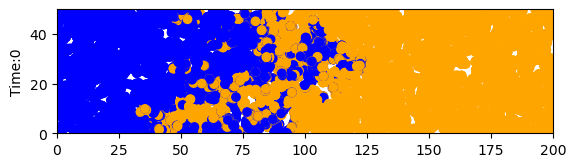

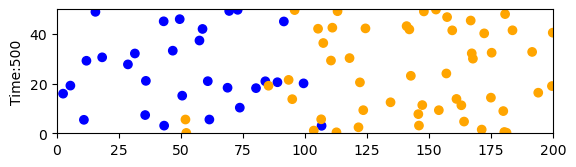

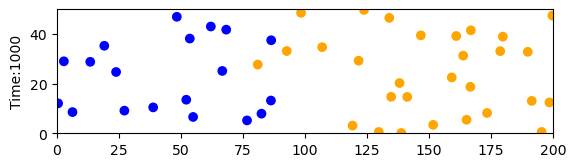

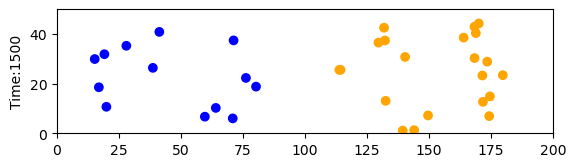

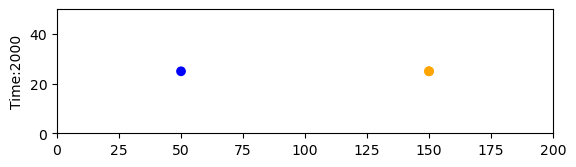

In [7]:
tree = ts.first()
for time in range(0, 2500, 500):
    nodes_at_time = np.where(nodes.time == time)[0]
    xs = []
    ys = []
    cs = []
    for node in nodes_at_time:
        location = ts.individual(ts.node(node).individual).location
        xs.append(location[0])
        ys.append(location[1])
        anc = list(sparg.ancestors(tree, node))
        if len(anc) > 0:
            cs.append(origin[anc[-1]])
        else:
            cs.append(origin[node])
    plt.scatter(xs, ys, color=cs)
    plt.axis("scaled")
    plt.ylim(0,50)
    plt.xlim(0,200)
    plt.ylabel("Time:" + str(time))
    plt.show()

In [8]:
np.random.seed(4)
num_samples = 40
samples = list(np.random.choice(ts.samples(), num_samples, replace=False))
ts_sim, map_sim = ts.simplify(samples=samples, map_nodes=True, keep_input_roots=False, keep_unary=True, update_sample_flags=False)

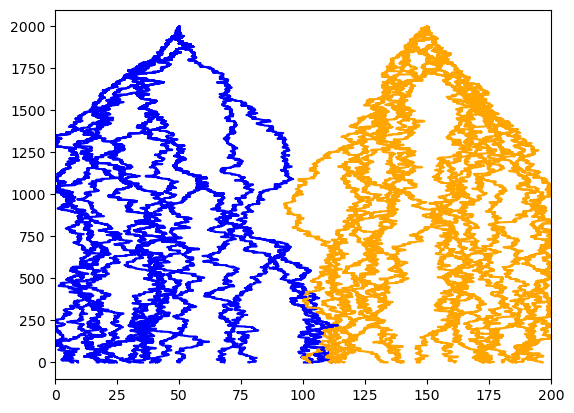

In [9]:
for i in range(num_samples):
    path = [i] + list(sparg.ancestors(ts_sim.first(), i))
    times = []
    locations = []
    for node in path:
        times.append(ts_sim.node(node).time)
        indiv = ts_sim.node(node).individual
        if indiv != -1:
            locations.append(ts_sim.individual(indiv).location[0])
    if locations[-1] == 50:
        plt.plot(locations, times, color="blue")
    else:
        plt.plot(locations, times, color="orange")
plt.xlim(0,200)
plt.show()

In [10]:
cutoff = 1250
ts_chopped = sparg.chop_arg(ts_sim, cutoff)
ts_small, maps_small = sparg.simplify_with_recombination(ts=ts_chopped, flag_recomb=True)
spatial_arg = sparg.SpatialARG(ts=ts_small, verbose=True)

Prepared input parameters - Section Elapsed Time: 0.0 - Total Elapsed Time: 0.0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 7178.80it/s]

Calculated covariance matrix - Section Elapsed Time: 0.05 - Total Elapsed Time: 0.06
Inverted covariance matrix - Section Elapsed Time: 0.0 - Total Elapsed Time: 0.06
Created root locations vector - Section Elapsed Time: 0.16 - Total Elapsed Time: 0.22
Estimated dispersal rate - Section Elapsed Time: 0.0 - Total Elapsed Time: 0.22
Calculated Fisher's information matrices - Section Elapsed Time: 0.0 - Total Elapsed Time: 0.22
Completed building SpatialARG object - Total Elapsed Time: 0.22


In [11]:
samples = []
genome_positions = []
times = []
locations = []
for sample in spatial_arg.ts.samples():
    samples.append(sample)
    genome_positions.append(0)
    times.append(cutoff)
    ancestor = sparg.find_ancestral_node_at_time(spatial_arg.ts.first(), sample, cutoff)
    indiv = spatial_arg.ts.node(ancestor).individual
    if indiv != -1:
        locations.append(spatial_arg.ts.individual(indiv).location[0])
    else:
        locations.append([None for d in range(1)])
df = pd.DataFrame({
    "sample":samples,
    "genome_position":genome_positions,
    "time":times,
    "true_location":locations
})

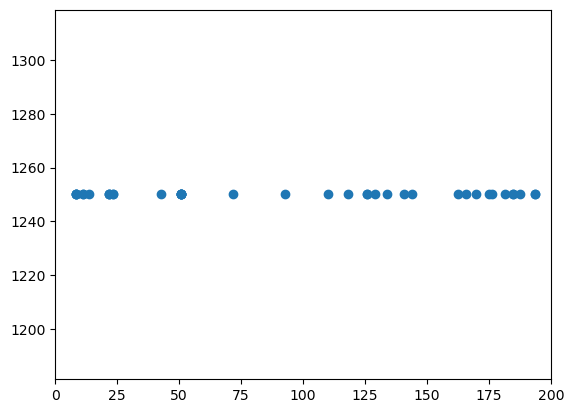

In [12]:
plt.scatter(df["true_location"], df["time"])
plt.xlim(0,200)
plt.show()

In [13]:
print(spatial_arg.ts.draw_text())

1250.00┊ 7856     79    72  7560  69 66        77         73      59    55  61   68 76 57 74  67   65 58 70 62 63 64 71 ┊
       ┊ ┃  ┃      ┃     ┃   ┃ ┃   ┃  ┃         ┃          ┃       ┃     ┃   ┃    ┃  ┃  ┃  ┃   ┃    ┃  ┃  ┃  ┃  ┃  ┃  ┃ ┊
1117.00┊ ┃  ┃      ┃     ┃   ┃ ┃   ┃  ┃        54          ┃       ┃     ┃   ┃    ┃  ┃  ┃  ┃   ┃    ┃  ┃  ┃  ┃  ┃  ┃  ┃ ┊
       ┊ ┃  ┃      ┃     ┃   ┃ ┃   ┃  ┃    ┏━━━━┻━━━━┓     ┃       ┃     ┃   ┃    ┃  ┃  ┃  ┃   ┃    ┃  ┃  ┃  ┃  ┃  ┃  ┃ ┊
773.00 ┊ ┃  ┃      ┃    53   ┃ ┃   ┃  ┃    ┃         ┃     ┃       ┃     ┃   ┃    ┃  ┃  ┃  ┃   ┃    ┃  ┃  ┃  ┃  ┃  ┃  ┃ ┊
       ┊ ┃  ┃      ┃    ┏┻━┓ ┃ ┃   ┃  ┃    ┃         ┃     ┃       ┃     ┃   ┃    ┃  ┃  ┃  ┃   ┃    ┃  ┃  ┃  ┃  ┃  ┃  ┃ ┊
748.00 ┊ ┃  ┃      ┃    ┃  ┃ ┃ ┃   ┃  ┃    ┃        52     ┃       ┃     ┃   ┃    ┃  ┃  ┃  ┃   ┃    ┃  ┃  ┃  ┃  ┃  ┃  ┃ ┊
       ┊ ┃  ┃      ┃    ┃  ┃ ┃ ┃   ┃  ┃    ┃        ┏┻━┓   ┃       ┃     ┃   ┃    ┃  ┃  ┃  ┃   ┃    ┃  ┃  ┃  ┃  ┃  ┃  ┃ ┊
737.00 ┊ ┃  ┃      ┃    

In [14]:
roots = sparg.estimate_locations_of_ancestors_in_dataframe_using_arg(
    df=df,
    spatial_arg=spatial_arg
)
roots["prob_left"] = norm.cdf(100, roots["arg_estimated_location_0"], np.sqrt(roots["arg_variance_in_estimated_location_0"]))

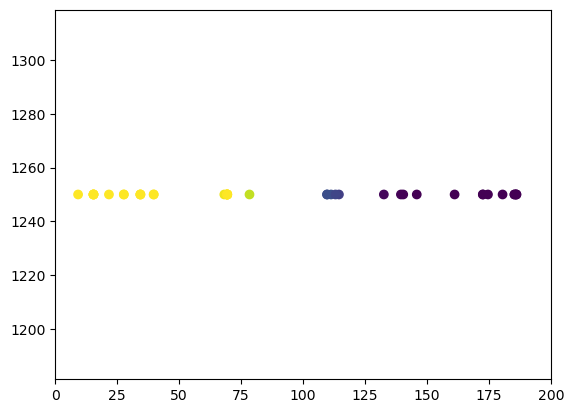

In [15]:
plt.scatter(roots["arg_estimated_location_0"], roots["time"], c=roots["prob_left"])
plt.xlim(0,200)
plt.show()

### Ridgeline Plot

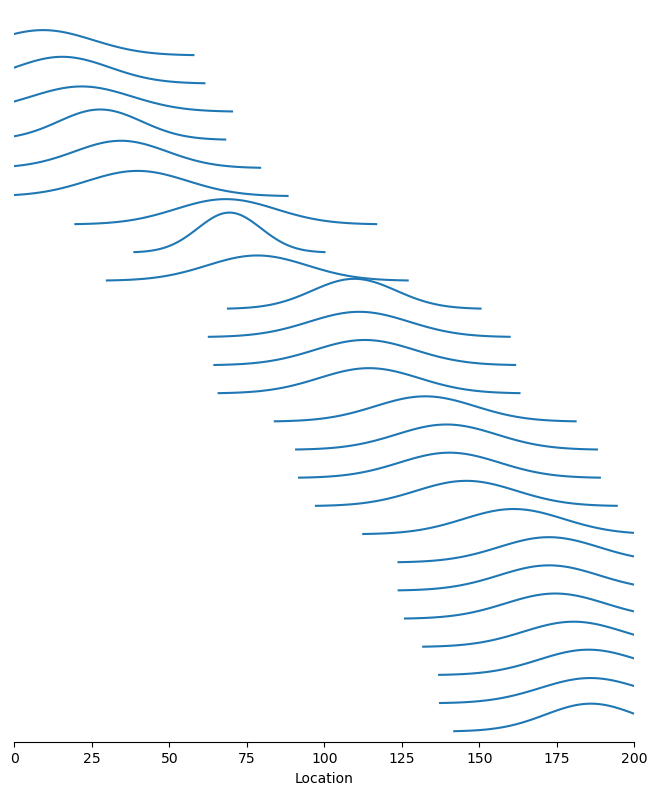

In [65]:
gs = (grid_spec.GridSpec(len(roots),1))

fig = plt.figure(figsize=(8,15))

#creating empty list
ax_objs = []

sorted_roots = roots.sort_values(by=["arg_estimated_location_0"], ascending=True)
sorted_roots = sorted_roots.drop_duplicates("arg_estimated_location_0").reset_index()

for i,root in sorted_roots.iterrows():
    # creating new axes object and appending to ax_objs
    ax_objs.append(fig.add_subplot(gs[i:i+1, 0:]))
    
    mu = root["arg_estimated_location_0"]
    sigma = np.sqrt(root["arg_variance_in_estimated_location_0"])
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    ax_objs[-1].plot(x, norm.pdf(x, mu, sigma))
    
    # setting uniform x and y lims
    ax_objs[-1].set_xlim(0, 200)
    ax_objs[-1].set_ylim(-0.01,0.045)

    # make background transparent
    rect = ax_objs[-1].patch
    rect.set_alpha(0)

    # remove borders, axis ticks, and labels
    ax_objs[-1].set_yticks([])

    if i == len(sorted_roots)-1:
        ax_objs[-1].set_xlabel("Location")
    else:
        ax_objs[-1].set_xticks([])

    spines = ["top","right","left","bottom"]
    for s in spines:
        if i == len(sorted_roots)-1 and s == "bottom":
            pass
        else:
            ax_objs[-1].spines[s].set_visible(False)

gs.update(hspace= -0.5)

plt.savefig("images/ancestral_location_distributions.svg")
plt.show()